# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [38]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [39]:
# Number of houses in the dataset
total_houses = len(housing_prices)

# Number of features in the dataset
total_features = len(housing_features[:][0])

# Minimum housing value in the dataset
minimum_price = min(housing_prices)

# Maximum housing value in the dataset
maximum_price = max(housing_prices)

# Mean house value of the dataset
mean_price = np.average(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: **

1. CRIM: per capita crime rate by town :
The safety environment around will have higher price. 

5. NOX: nitric oxides concentration (parts per 10 million) :
More green and trees around will have higher price. 

10. TAX: full-value property-tax rate per $10,000 :
high tax will lower willing to buy house

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [40]:
chosen_features = ['CRIM', 'NOX','TAX']
features = city_data.feature_names.tolist()
for feature in chosen_features:
    index = features.index(feature)
    print CLIENT_FEATURES[0][index]
print CLIENT_FEATURES

11.95
0.659
680.0
[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer:**

1. 11.95

5. 0.659

10. 680.0




# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [41]:
# Put any import statements you need for this code block here
import numpy as np
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.30, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: **

We want to use test data to evaluate model performance. To surmont overfitting. 

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [42]:
# Put any import statements you need for this code block here
import numpy as np
from sklearn import metrics 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    error = metrics.mean_squared_error(y_true, y_predict, sample_weight=None, multioutput='uniform_average')
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: **
I choose to use MSE.

Accuracy: (true positive+true negatives)/(size of all trained) is more use in classification. 

Precision: (true positive)/(true positive+false positive) is  using in classification.

Recall: (true positive)/(true positive+false negative) is  using in classification. 

F1 -score is calculated based on precision and recall value. 

So all above 4 can not use in this continuous price estimation. 

Choose between MSE and MAE will more depend on loss function. 

MAE taking care outlier better and converge slower. MSE is more easier to calculated gradient descent. 
There will be no big difference if we use enough iteration and no outliers.

The reason I choose MSE is I am more concern about large error more than the small error it made in estimation.
If the bias from real price is 4.0 I will care it much much more (more than double) than the deviate only for 2.0. 
Or say large error is not my desire in this model prediction. 





## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

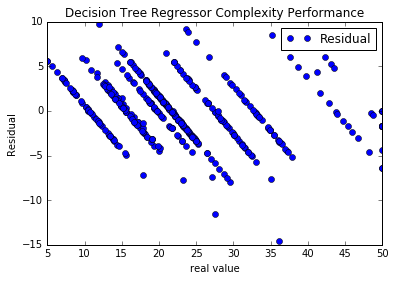

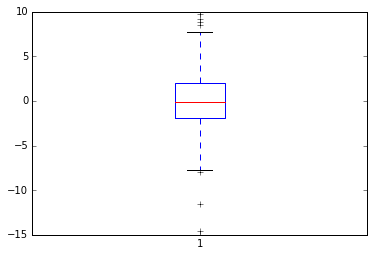

Successfully fit a model!


In [52]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn import grid_search
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    residual=reg.predict(housing_features)-housing_prices
    pl.figure()
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(housing_prices, residual, "o" , label = 'Residual')
    pl.legend()
    pl.xlabel('real value')
    pl.ylabel('Residual')
    pl.show()
    pl.boxplot(residual)
    pl.show()
    
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

When you want to find the best parameter, and the set of parameter is descrete. Grid Search will work. 

For Example, when fit a Ridge Regression model, value alpha (control regularization). We can find the best alpha to gain best Error_out (out of sample error) estimation.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **

In Cross validation or call rotaion estimation is using training dataset to for model training and using testing data(or first seen data) against model for testing. 
one round cross-validation is simple split data into  training dataset and testing dataset, using one dataset for training and another dataset for testing. In order to reduce the variability, multiple round cross_valiation is using in general. 

Especially k-fold cross-valiation, is  divided dataset into k-equal size partition, use 1 fold for testing each time, rest for  training, do k times and get the average performance on this k times. 

So in grid search, cross-valiation can help us choose which parameter works better. in GridSearchCV, cv default is using 3 -fold cross validation. All the parameter choose will based on cross-valiation score result. So if we limited Grid search on one dataset, it will still performance good because of 3-fold cv is using to prevent overfitting. 


# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [45]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [47]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


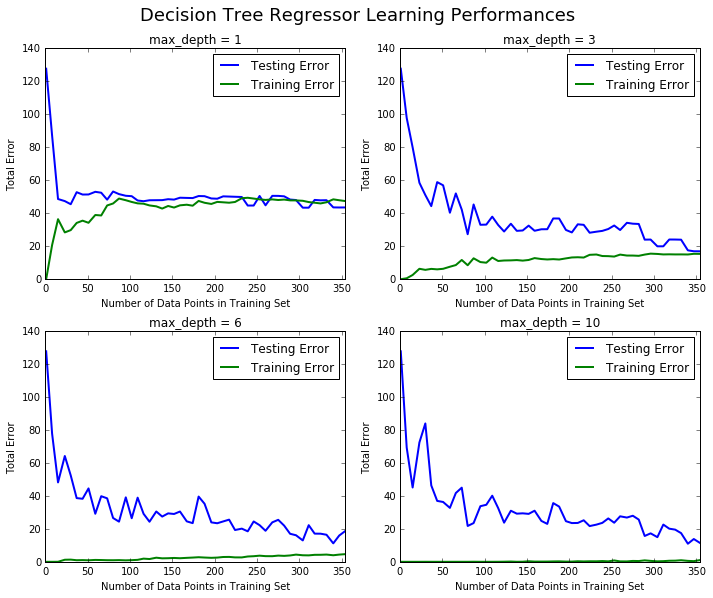

In [48]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **

choose graph 2 : max_depth =3 as example. 

For that fixed model complexity,

While size of training set increase, at the beginning(trainning size <=100 ), testing error will decrase very quick and at a certain trainning size(trainning size >100 ), it start to slowerly converge to a number.

While size of training set increase, at the beginning(trainning size <=100 ), training error will increase very quick and at a certain trainning size(trainning size >100 ), it start to slowerly converge to a number.


## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

when max depth is 1, model is suffering high bias. (both testing error and training error are very high)

When max depth is 10, model is suffering high variance (overfitting). (testing error is converge to around 10 while training error is almost 0)

Creating a model complexity graph. . . 


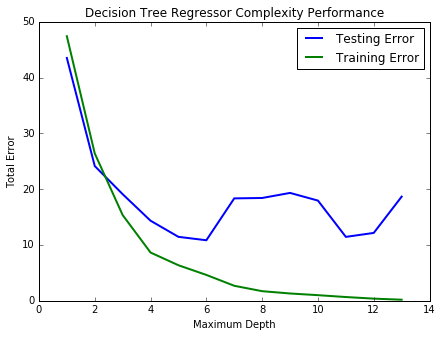

In [57]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

Based on above graphs:

When model complexity increase (max_depth increase), training error will always decrease. (Start with very quick and slower down when model complexity increasing). At the same time, testing error is like a U shape, at the beiging , it also decrease very quick, but when it reach max_depth =6 (the global minimum), the testing error start to bounce back. 

So, max_depth = 6 will be the best for generalization. 

While max_depth=6, testing error reaching the global minimum. and at the same time, training error is very low. 
If we choose max_depth < 6, then we have more chance get a underfitting model (high on bias and variance), when we choose max_depth > 6 , we would get a overfitting model (super low bias but high variance). 


# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [54]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: **
While not using cross validation, the best max_depth is 4. compare to my initial intuition 6 is lower. 
The reason is the grid search using 3-fold validation and get more stability in max-depth calculation. 

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [24]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])
y_pred=reg.predict(housing_features)
print performance_metric(housing_prices,y_pred)

Predicted value of client's home: 21.630
9.10649922321


**Answer: **

The prediction of client home is 21.63 compare to 
Mean house price: 22.533
Median house price: 21.2
is more close to the median house price is training dataset. 

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **
I will not use this model. 
There are several reasons. 

1. Simple split cross validation is not a best out of sample error estimation in above learning curve plot. K-fold cross validation is better option in geneal model validation. I tried to rerandom the model several times, each time it give me out a different best model on learning curves. simple split will leads to much more unstable out of sample error estimation. 
2. This model is a decision treee model, but our purporse is to predict a continuous house price. 
reg.score(housing_features, housing_prices) is 0.8921 in this case, not a good performance value.  In general, I will chose ridge regression instead of decision tree. 

note:
I swith to use ridge regression with 10-fold cross validation.
best performance model is :
Feature number: 6 , Best Polynomial: 3 , Best Alpha: 0.19398004229085733 ,
Error_out: 11.0890440822 , Error_in: 7.86713970827
Rsquare: 0.90547911272673731

Prediction for that client: 24.01912735



In [ ]:
#ridge regression code
#take sometime to do full run
# Importing a few necessary libraries
import numpy as np
import math  as math
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import cross_validation
from sklearn import linear_model
from sklearn import preprocessing

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]
# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()
# random shuffule data
shuffle_by=np.arange(0,len(city_data.target),1)
np.random.shuffle(shuffle_by)
# Initialize the housing prices and housing features
housing_prices = city_data.target[shuffle_by]
housing_features = city_data.data[shuffle_by]


#variable selection

housing_features.shape
selector=SelectPercentile(f_regression)
selector.fit_transform(housing_features,housing_prices)
score=-np.log10(selector.pvalues_)
all_score=np.random.rand(2,len(score))
all_score[0][:]=-np.log10(selector.pvalues_)
all_score[1][:]=np.arange(0,len(score),1)
all_score_trans=all_score.transpose()
E_avg_rec=1000000.0
bestpoly=0
bestalpha=0.0
E_avg_in=0
alpha_power_list = np.arange(-5,5,0.02)
alpha_select_list=[math.exp(alpha_select_list) for alpha_select_list in alpha_power_list]
for featuren in range(1,14):
    #n feature want to keep
    #featuren=13

    housing_features_new=SelectKBest(f_regression,k=featuren).fit_transform(housing_features,housing_prices)

    #Regression Model with Ridge Regularization
    #10-fold Cross Validation Involved
    #selection of Polynomial
    #selection of regularization alpha

    foldern=10
    polyn=0
    for maxpoly in range(1,3):
        if math.factorial(maxpoly+featuren-1)/(math.factorial(maxpoly)*math.factorial(featuren-1)) >= len(housing_prices)/2 and math.factorial(maxpoly+featuren-2)/(math.factorial(maxpoly-1)*math.factorial(featuren-1)) <= len(housing_prices)/2:
            polyn=maxpoly-1
    if polyn==0:
        polyn=9
    E_out=np.zeros((polyn,len(alpha_select_list),foldern),dtype=float)
    E_in =np.zeros((polyn,len(alpha_select_list),foldern),dtype=float)
    for k in range(1,polyn+1):
        if k == 1:
            housing_features_poly=housing_features_new
        else:
            poly=preprocessing.PolynomialFeatures(k)
            housing_features_poly=poly.fit_transform(housing_features_new)
        kf=cross_validation.KFold(len(housing_features_poly), n_folds=foldern)
        i=0
        for alpha_select in alpha_select_list:
            j=0
            for train, test in kf:
                X_train, X_test, Y_train, Y_test = housing_features_poly[train], housing_features_poly[test], housing_prices[train], housing_prices[test]
                #Fitting use Ridge regression model
                clf = linear_model.Ridge (alpha = alpha_select)
                clf.fit(X_train, Y_train)
                E_in[k-1][i][j] =np.dot((Y_train-clf.predict(X_train)),(Y_train-clf.predict(X_train)).transpose())/len(Y_train)
                E_out[k-1][i][j]=np.dot((Y_test-clf.predict(X_test)),(Y_test-clf.predict(X_test)).transpose())/len(Y_test)
                j+=1
            #searching for best model
            if E_avg_rec > np.mean(E_out[k-1][i][:]):
                bestfeaturen=featuren
                bestpoly = k
                bestalpha = alpha_select
                E_avg_rec = np.mean(E_out[k-1][i][:])
                E_avg_in  = np.mean(E_in[k-1][i][:])
            i+=1
            

#fit the selected model with full data
best_model = linear_model.Ridge (alpha = bestalpha)
poly=preprocessing.PolynomialFeatures(bestpoly)
housing_features_new=SelectKBest(f_regression,k=bestfeaturen).fit_transform(housing_features,housing_prices)
housing_features_poly=poly.fit_transform(housing_features_new)
best_model.fit(housing_features_poly, housing_prices)
print best_model.score(housing_features_poly, housing_prices)
E_in_best=np.dot((housing_prices-best_model.predict(housing_features_poly)),(housing_prices-best_model.predict(housing_features_poly)).transpose())/len(housing_prices)
print E_in_best

#Process the Prediction Data
best_feature_index=list(all_score_trans[all_score_trans[:,0].argsort()][:][(len(all_score_trans)-bestfeaturen):][:,1].astype(int))
best_client_feature=np.array(CLIENT_FEATURES[0])[sorted(best_feature_index)]
best_client_feature_poly=poly.fit_transform(best_client_feature)

#Prediction
best_model.predict(best_client_feature_poly)